## Desafío - Gráficos y correlación

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### 1. Importar librerías y .csv

Importe las librerías básicas para el análisis de datos
Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato
¿Cómo lo podemos solucionar?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("nations.csv", encoding = "ISO-8859-1").drop("Unnamed: 0", axis = 1) #Este encoding soporta carácteres latinos. 

In [2]:
df.head(5)

country  region           gdp    school      adfert  chldmort  \
0       Algeria  Africa   7300.399902  6.716667    7.300000     34.75   
1         Benin  Africa   1338.800049  3.100000  111.699997    122.75   
2      Botswana  Africa  12307.400391  8.600000   52.099998     60.25   
3  Burkina Faso  Africa   1063.400024  1.300000  124.800003    170.50   
4       Burundi  Africa    349.200012  2.483333   18.600000    168.50   

        life       pop      urban  femlab   literacy   co2       gini  
0  72.316666  34172236  64.933334  0.4522  72.599998  15.0        NaN  
1  54.733334   8237634  41.000000  0.8482  41.700001   1.2        NaN  
2  52.250000   1941233  59.250000  0.8870  84.099998   9.2        NaN  
3  53.783333  15308383  23.583334  0.8584  23.600000   0.2        NaN  
4  48.866665   7821783  10.250000  1.0344  66.599998   0.1  33.299999

La base de datos contiene información a nivel mundial sobre demografía:

* country : País.
* region : Continente del país.
* gdp : Producto Interno Bruto per cápita, precios 2005.
* school : Promedio años de escolaridad.
* adfert : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* chldmort : Probabilidad de muerte antes de los 5 años por cada 1000.
* life : Esperanza de vida al nacer.
* pop : Población total.
* urban : Porcentaje de población urbana.
* femlab : Tasa entre hombres y mujeres en el mercado laboral.
* literacy : Tasa de alfabetismo.
* co2 : Toneladas de Co2 mitidas per cápita.
* gini : Coeficiente de desigualdad del ingreso.

Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .

Apellidos desde la M hasta la Z: Enfocarse en las variables femlab , literacy y school .

### 2. Refactor gráficos matplotlib a seaborn
* A continuación se presenta una serie de gráficos construídos con matplotlib . Se le pide refactorizarlos utilizando seaborn.

    
   * Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.
   
``` python

plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

```

#### a) Refactorizar
``` python
def binarize_histogram(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
```

In [3]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [39]:
def my_graf_funct(x,color):
    sns.distplot(x,kde=False,color='gray')
    plt.axvline(np.mean(x),color='green')
def binarize_histogram_seaborn(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    grid = sns.FacetGrid( tmp, col = 'binarize' , height = 5, aspect =0.9 , col_wrap = 2 , margin_titles =True, sharex=False)
    grid.map(my_graf_funct,"adfert")
    grid.axes[0].set_title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    grid.axes[1].set_title("{0} < {1}".format(variable, round(np.mean(tmp[variable]), 3)))




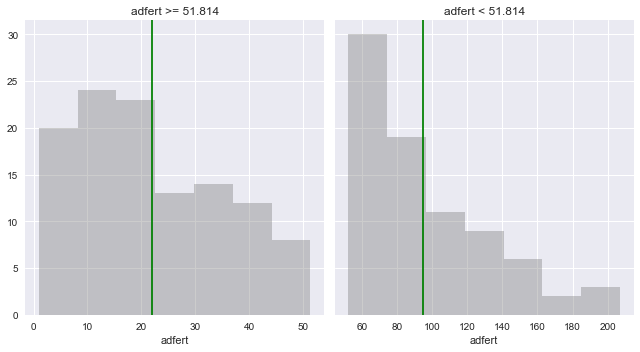

In [40]:
binarize_histogram_seaborn(df, 'adfert')

#### b) Refactorizar
``` python
def grouped_boxplot(dataframe, variable, group_by):
tmp = dataframe
stratify_by = tmp[group_by].unique()
if len(stratify_by) / 2 > 3:
fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
else:
fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
for i, n in enumerate(stratify_by):
ax[i].boxplot(tmp[tmp[group_by] == n][variable])
ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')
```

In [6]:
def box_splot_seaborn(dataframe, x, y):
    sns.boxplot(x=x,y=y,data=dataframe).set_title('Boxplot '+x);

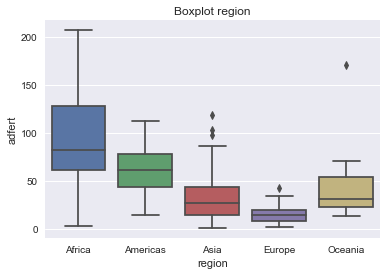

In [7]:
box_splot_seaborn(df,'region','adfert')

#### c) Scatterplot refactor
``` python

def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
        
grouped_scatterplot(df, 'school', 'adfert', 'region')
```

In [8]:
def grouped_scatterplot_sb(dataframe, x, y, group_by):
    g = sns.FacetGrid(dataframe, col=group_by)
    g = g.map(sns.scatterplot,x,y)

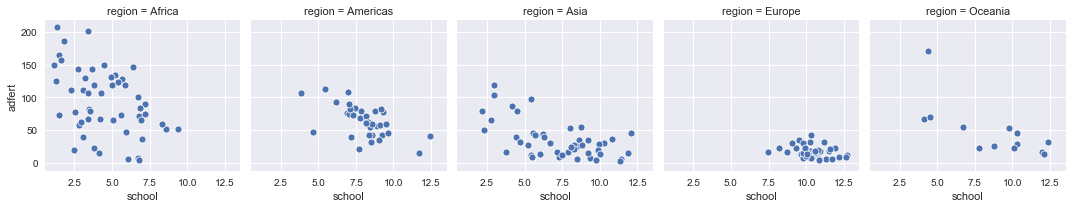

In [9]:
grouped_scatterplot_sb(df, 'school', 'adfert', 'region')

### 3. Genere un heatmap entre todas las variables

* En base a las variables de interés asignadas, comente cuáles son las principales
correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [10]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

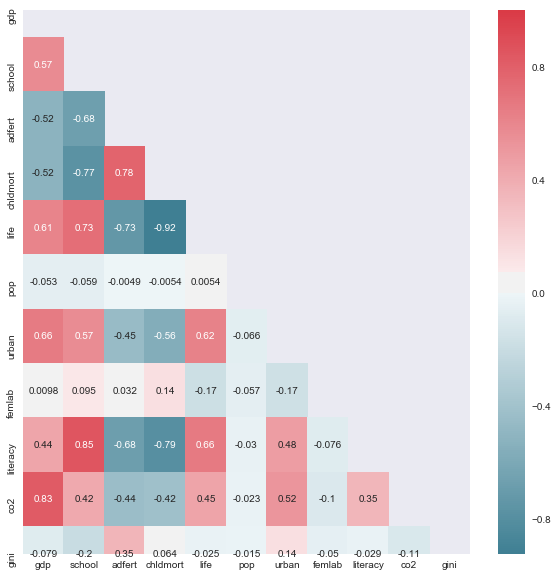

In [11]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap = cmap);

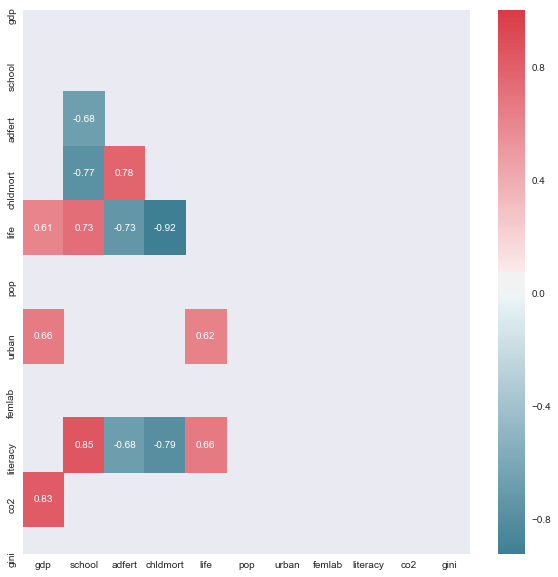

In [12]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr[abs(corr)>0.6], annot=True, mask = mask, cmap = cmap);

La mortalidad infantil tiene una relación directa con la fertilidad adolescente por lo que se puede inferir que ser padre a menor aumenta la probabilidad de causar una muerte antes de los 5 años

La mortalidad infantil tiene relación a la desigualdad de los ingresos de los padres o tutores. A menor ingreso, mayor probabilidad de muerte infantil

La esperanza de vida al nacer es mayor si el porcentaje de población urbana es mayor

La esperanza de vida al nacer es mayor en relación al alfabetismo

A mayor alfabetismo menor mortalidad infantil

A menor esperanza de vida mayor mortalidad infantil

### 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

* tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:,['variables', 'a', 'agregar']]
* No olvide agregar la variable region .
* tip: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

In [13]:
new_df = df.loc[:,['adfert', 'chldmort', 'life', 'literacy', 'region']]

def agrupador(df,var):
    iterador = df[var].unique()
    for i in iterador:
        tmp=df[df[var]==i]
        plt.figure(figsize=(10,10))
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(tmp.corr(), annot=True, cmap = cmap).set_title(var+' '+i);
    plt.show()


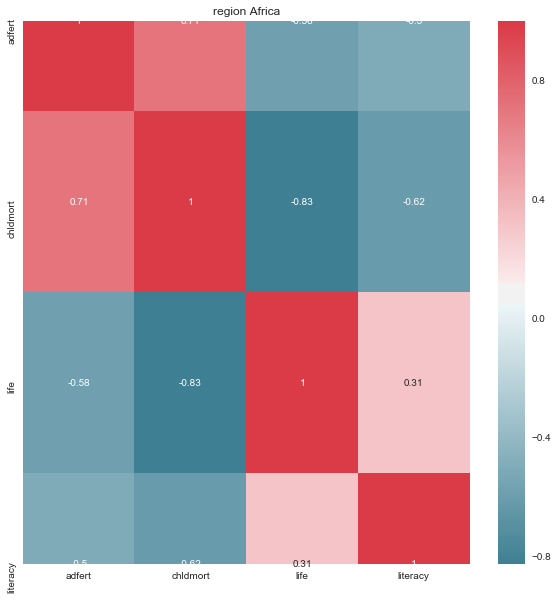

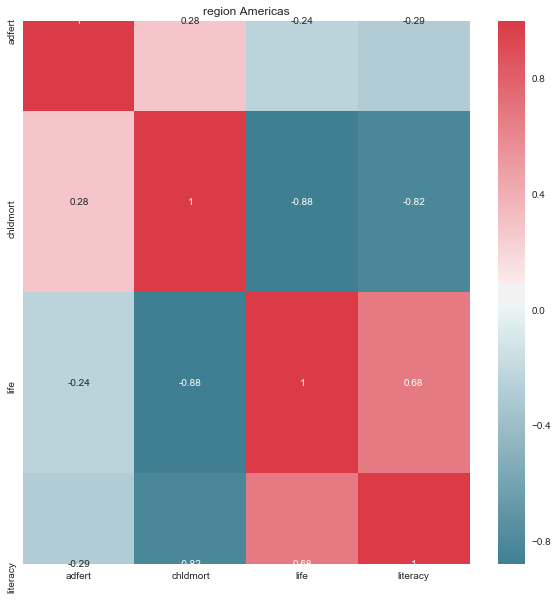

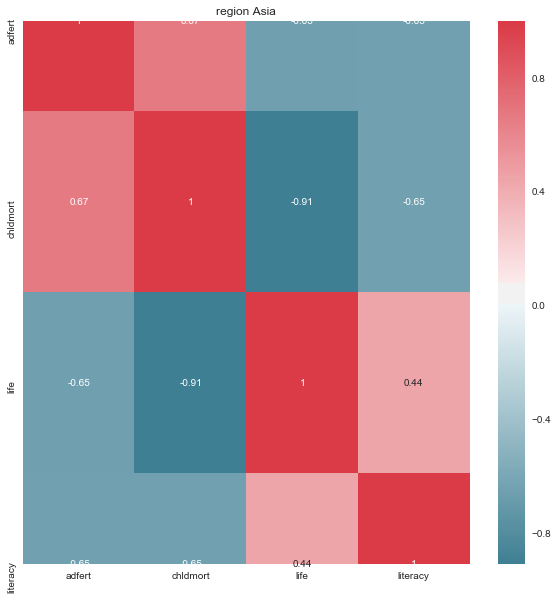

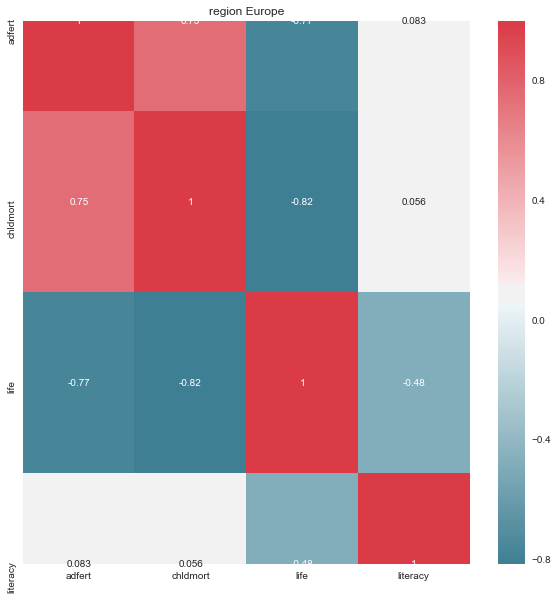

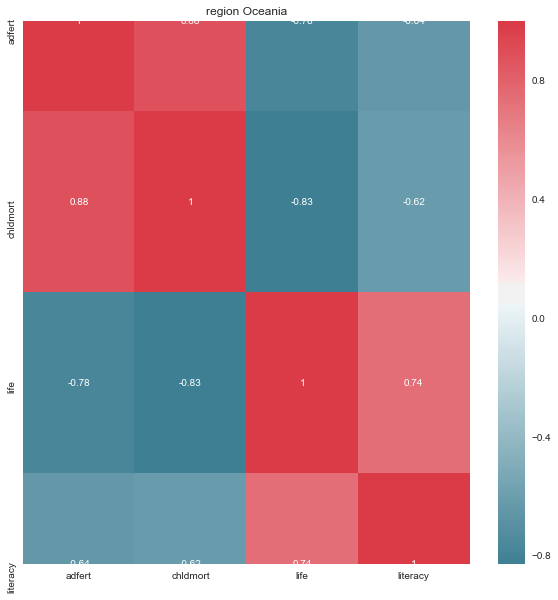

In [14]:
agrupador(new_df,'region')

Las correlaciones se parecen bastante entre regiones, sin embargo hay algunas excepciones.
En la region de europa, es mas importante el alfabetismo para una mejor calidad de vida.
Además en esta región se desliga el alfabetismo de la paternidad adolescente y la mortalidad infantil. Pareciera tener muy poca relación. Lo anterior descrito, nos refleja que se tiende a separar en la cultura europea la literatura de estos otros dos factores.